### Display Raw Data

In [108]:
import Modularized_Data_Processing as mdp
import mne
import glob

filepath = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\second_try\BCIproject_trial-N-1.2-11-2021_raw.fif.gz"

PATH1 = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
PATH2 = r"C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
FIRST_TRY = "/first_try/"
SECOND_TRY = "/second_try/"
PATH = PATH1
FILENAME1 = PATH + FIRST_TRY + "BCIproject_trial-S5_raw.fif.gz"
FILENAME2 = PATH + "BCIproject_trial-S3_raw.fif.gz"
FILENAME3 = PATH + "BCIproject_trial-1.2-11-2021_raw.fif.gz"
S_FILES = [f for f in glob.glob(PATH + '*S*raw.fif.gz')]
N_FILES = [f for f in glob.glob(PATH + '*N*raw.fif.gz')]
NEW_N_FILES = [f for f in glob.glob(PATH + '*N-*raw.fif.gz')]
FILE = FILENAME2
FILENAMES = NEW_N_FILES

#Load data
data = mdp.load_data(FILE)

# data = mdp.load_many_data(FILENAMES)

Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\/second_try/BCIproject_trial-S3_raw.fif.gz...


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Owner\\OneDrive - Regis University\\laryngeal_bci\\data\\fifs\\second_try\\BCIproject_trial-S3_raw.fif.gz'

In [95]:
data.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, C3, C4, T5, T6, O1, O2, F7, F8, F3, F4, T3, T4, P3, P4
 chs: 16 EEG
 custom_ref_applied: False
 dig: 19 items (3 Cardinal, 16 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 16
 projs: []
 sfreq: 125.0 Hz
>

In [96]:
sfreq = data.info['sfreq']
print("Sample freq (sfreq) is: " + str(sfreq) + " Hz")

Sample freq (sfreq) is: 125.0 Hz


In [97]:
data.info.ch_names

['Fp1',
 'Fp2',
 'C3',
 'C4',
 'T5',
 'T6',
 'O1',
 'O2',
 'F7',
 'F8',
 'F3',
 'F4',
 'T3',
 'T4',
 'P3',
 'P4']

In [98]:
%matplotlib widget

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 207 samples (1.656 sec)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

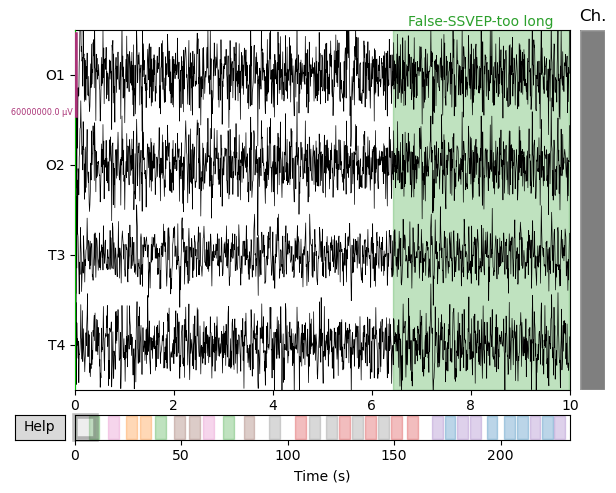

In [99]:
#display raw data

chns = data.info.ch_names

picks = ["O1", "O2", "T3", "T4"]

chn_idxs = []
for chn in picks:
    chn_idxs.append(chns.index(chn))

#apply the bandpass filter

low_fq = 5
hi_fq = 40

crpd_data = data.crop(2)
cd_fd_data = data.filter(5, 50)
    
cd_fd_data.plot(scalings="30", order=chn_idxs, n_channels=4, event_color={1 : "white"}) #How do I make this interactive; seems to work now

### Display Alpha-Waves on a Spectrogram

In [100]:
ants = [i["description"] for i in data.annotations]
novel_ants = []
for i in range(len(ants)):
    if ants[i] in ants:
        if ants[i] not in novel_ants:
            novel_ants.append(ants[i])
        continue
        
print(len(novel_ants))

8


In [105]:
epoch_type = "SSVEP"

f1, f2 = mdp.get_epochs(epoch_type, data, nperseg=2000, noverlap=1000, channels=["O1", "O2", "T3", "T4"]) #f1_empty should be empty in the case of alpha waves (there are no false alpha wave trials); only look at f2

true_found is: 0


In [102]:
f2

0

## Print True Trials

In [103]:
for z in range(len(f2.specs)):
    print("Annotation: " + "True-" + epoch_type + "-")
    print("Looking at f2 " + str(z))
    mdp.plot_spectrogram(f2.ts[z], f2.fs[z], f2.specs[z])

AttributeError: 'int' object has no attribute 'specs'

## Print False Trials

In [104]:
for z in range(len(f1.specs)):
    print("Annotation: " + "False-" + epoch_type + "-")
    print("Looking at f1 " + str(z))
    mdp.plot_spectrogram(f1.ts[z], f1.fs[z], f1.specs[z])

AttributeError: 'int' object has no attribute 'specs'